_La base des TPs pour le cours "Classification des données" a été prise du cours en ligne "Open Machine Learning Course" (https://mlcourse.ai/, __auteur Yury Kashnitsky__)_ 

# <center> TP 1 : Analyse exploratoire et analyse visuelle de données avec la librairie Pandas et Seaborn

##  <center> Analyse des données de maladies cardiovasculaires

Pour vous entraîner avec les librairies Pandas et Seaborn, et aussi l’AED (Analyse Exploratoire de Données), vous pouvez remplir les lignes ci-dessous où vous analyserez un ensemble de données sur les maladies cardiovasculaires.

### Problème

Prédire la présence ou l'absence de maladie cardiovasculaire (MCV) en utilisant les résultats de l'examen du patient.

### Description des données

Il existe 3 types de caractéristiques d'entrée:

- *Objectives*: informations factuelles;
- *Examinées*: résultats d'un examen médical;
- *Subjectives*: informations données par le patient.

La description des données en anglais :

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Toutes les valeurs du dataset ont été collectées au moment de l'examen médical.

# Partie 1. Analyse préliminaire des données

Tout d'abord, nous allons initialiser l'environnement:

**Ex.1 : Importez tout les bibliothèques nécessaires : `pandas`, `numpy` et `seaborn`**

In [ ]:
# You code here
# Import all required modules
import pandas as pd
import numpy as np

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()

Configurons les bibliothèques `seaborn` and `matplotlib` pour l'analyse visuelle :

In [ ]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

**Ex.2 : Chargez les données (en utilisant la méthode `read_csv`) du lien `url` indiqué ci-dessous, et affichez les 5 premières lignes en utilisant la méthode `head`:**

In [ ]:
url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlbootcamp5_train.csv"

# You code here

url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlbootcamp5_train.csv"
df = pd.read_csv(url, sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Ex.3 : Examinez les données avec la methode `.info()` et répondez aux questions :**
1. Quelle est la dimensionnalité des données ? 
2. Quels sont les noms et les types de caractéristiques présentées ? 
3. Combien il y a des caractéristiques avec données manquantes `null` ?

In [ ]:
# You code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

**Reponse :**
1. 70000 enregistrements au total
2. df.columns (tout les caractéristiques sont continus selon .info())
3. 0

Il serait instructif de jeter un coup d'oeil aux valeurs de nos variables.

Convertissons les données au format *long* et affichons le nombre de valeurs des entités catégoriques en utilisant [`factorplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html).

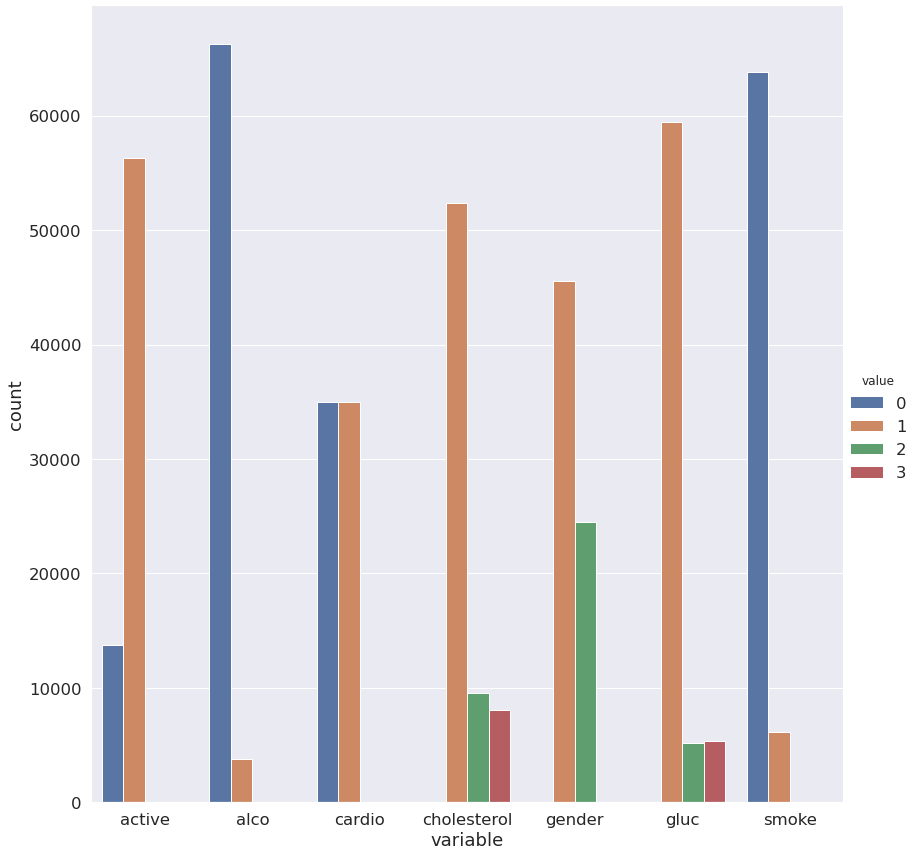

In [ ]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

Nous pouvons voir que les classes cibles (cardio = {0,1}) sont équilibrées. C'est génial !

Separons l'ensemble des données selon les valeurs cibles. Peut-on déjà repérer la caractéristique la plus significative simplement en regardant les graphiques ?

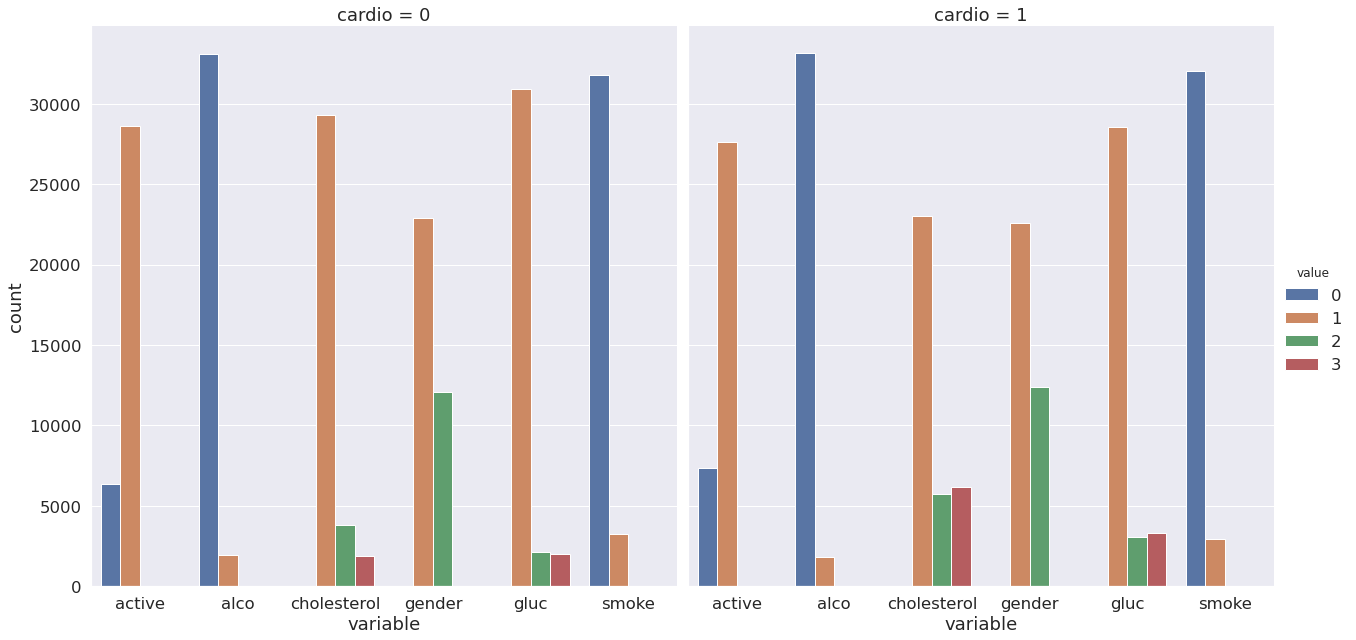

In [ ]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9);

On peut voir que la distribution des niveaux de cholestérol et de glucose diffère grandement par la valeur de la variable cible. Est-ce une coïncidence?

Maintenant, calculons quelques statistiques pour les valeurs uniques de la caracteristique:

In [ ]:
print("All features unique values : \n")
print("\t", 10 * '-')
for c in df.columns:
    n = df[c].nunique()
    print("\t", c)
    if n <= 3:
        print("\t", n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print("\t", n)
    print("\t", 10 * '-')

All features unique values : 

	 ----------
	 id
	 70000
	 ----------
	 age
	 8076
	 ----------
	 gender
	 2 [(1, 45530), (2, 24470)]
	 ----------
	 height
	 109
	 ----------
	 weight
	 287
	 ----------
	 ap_hi
	 153
	 ----------
	 ap_lo
	 157
	 ----------
	 cholesterol
	 3 [(1, 52385), (2, 9549), (3, 8066)]
	 ----------
	 gluc
	 3 [(1, 59479), (2, 5190), (3, 5331)]
	 ----------
	 smoke
	 2 [(0, 63831), (1, 6169)]
	 ----------
	 alco
	 2 [(0, 66236), (1, 3764)]
	 ----------
	 active
	 2 [(0, 13739), (1, 56261)]
	 ----------
	 cardio
	 2 [(0, 35021), (1, 34979)]
	 ----------


**Finalement, nous avons:**
- 5 caractéristiques numériques (hors *id*);
- 7 caractéristiques catégoriques;
- 70000 enregistrements au total.

## 1.1. Observations basiques

**Ex. 4 : Combien d'hommes et de femmes sont présents dans cet ensemble de données ?** 

Les valeurs de la caractéristique `gender` n'ont pas été données (c'est pas clair que "1" représente les femmes ou les hommes) - déterminez-le en analysant la taille, en supposant que les hommes sont plus grands en moyenne.

In [ ]:
# You code here
mean_gen_1 = df[df['gender']==1]['height'].mean()
mean_gen_2 = df[df['gender']==2]['height'].mean()
print('Gender 1 has the average height : ', mean_gen_1)
print('Gender 2 has the average height : ', mean_gen_2)
print('So, {} is man'.format(1 if mean_gen_1>mean_gen_2 else 2))

Gender 1 has the average height :  161.35561168460356
Gender 2 has the average height :  169.94789538210054
So, 2 is man


In [ ]:
nb_women, nb_men = df['gender'].value_counts()

In [ ]:
print("In the data we have : {} men and {} women".format(nb_men, nb_women))

In the data we have : 24470 men and 45530 women


**Ex. 5 : Quel `gender` déclare le plus souvent consommer de l'alcool - hommes ou femmes ?**

In [ ]:
# You code here
pd.crosstab(df['gender'], df['alco'])

alco,0,1
gender,,
1,44369,1161
2,21867,2603


**Reponse :** Gender 2 (man)

**Ex. 6 : Quelle est la différence entre les pourcentages de fumeurs chez les hommes et les femmes (arrondi) ?**

In [ ]:
# You code here
print(df[df['gender']==1]['smoke'].value_counts(normalize=True))
print(df[df['gender']==2]['smoke'].value_counts(normalize=True))

## or simply
## df.groupby('gender')['smoke'].mean()

0    0.982144
1    0.017856
Name: smoke, dtype: float64
0    0.78112
1    0.21888
Name: smoke, dtype: float64


**Reponse :** Différence est 20.1 %

**Ex. 7 : Quelle est la différence entre les valeurs médianes d'âge chez les fumeurs et les non-fumeurs (en mois, arrondies) ?** 

Vous devrez déterminer les unités de la fonctionnalité `age` dans cet ensemble de données.

In [ ]:
# You code here

df['age_in_month']=np.int_(df['age']/30.5)
aver_age_non_smoke, aver_age_smoke = df.groupby('smoke')['age_in_month'].median()

print('Average age of non-smoking people : ', aver_age_non_smoke)
print('Average age of smoking people : ', aver_age_smoke)
print('Difference : {} month'.format(int(aver_age_non_smoke - aver_age_smoke)))

Average age of non-smoking people :  646
Average age of smoking people :  627
Difference : 19 month


## 1.2. Les cartes de risque (Bonus)

Sur le site de la société européenne de cardiologie [l'échelle de SCORE ](https://www.escardio.org/Education/Practice-Tools/CVD-prevention-toolbox/SCORE-Risk-Charts) est fournie. Elle est utilisée pour calculer le risque de décès d'une maladie cardiovasculaire (MCV) dans les 10 prochaines années :
<img src=https://habrastorage.org/webt/ik/gx/hr/ikgxhr3w1vzqihgitgrbdorfb14.png width=60%>

Jetons un coup d'oeil au rectangle supérieur droit, qui montre un sous-ensemble d'hommes fumeurs âgés de 60 à 65. (Il n'est pas évident, mais les valeurs de la figure représentent la limite supérieure).

Nous voyons la valeur 9 dans le coin inférieur gauche du rectangle et 47 dans le coin supérieur droit. Cela signifie que, pour les personnes de ce groupe de sexe-âge dont la pression systolique est inférieure à 120, le risque d'une MCV est estimé à 5 fois plus faible que pour ceux avec la pression dans l'intervalle [160,180].

**Ex. 8 (Bonus) :  Calculez le même tableau (seulement rectangle supérieur droit) en utilisant nos données.**

Clarifications :
- Calculez la fonction `age_years` - arrondissez l'âge au nombre d'années le plus proche. Et pour cette tâche, sélectionnez uniquement les personnes de 60 à 64 ans inclusivement.
- Les catégories de taux de cholestérol diffèrent entre la figure et notre ensemble de données. La conversion pour la fonction `cholestérol` est la suivante: 4 mmol/l $\rightarrow$ 1; 5-7 mmol/l $\rightarrow$ 2; 8 mmol/l $\rightarrow$ 3.

In [ ]:
# You code here
df['age_in_years']=np.int_(df['age']/365.25)

df_old = df[df['age_in_years'] >= 60][df['age_in_years'] <= 64][df['ap_hi']>=80][df['ap_hi']<=180]
df_old.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_in_month,age_in_years
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,37.729725,725,60
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,29.983588,740,61
10,15,22530,1,169,80.0,120,80,1,1,0,0,1,0,28.010224,738,61
22,32,23046,1,158,90.0,145,85,2,2,0,0,1,1,36.051915,755,63
23,33,23376,2,156,45.0,110,60,1,1,0,0,1,0,18.491124,766,64


In [ ]:
def ap_hi_transf (x):
    if (x<=120):
        return 120
    elif (x>120 and x<=140):
        return 140
    elif (x>140 and x<=160):
        return 160
    else:
        return 180

In [ ]:
df_old['ap_hi_new'] = df['ap_hi'].apply(ap_hi_transf)
df_old.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_month,age_in_years,ap_hi_new
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,725,60,140
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,740,61,140
10,15,22530,1,169,80.0,120,80,1,1,0,0,1,0,738,61,120
22,32,23046,1,158,90.0,145,85,2,2,0,0,1,1,755,63,160
23,33,23376,2,156,45.0,110,60,1,1,0,0,1,0,766,64,120


In [ ]:
pd.pivot_table(df_old, index=['age_in_years','ap_hi_new'],
               columns=['gender','smoke','cholesterol'],
               values='cardio',aggfunc=np.mean)

gender                         1                                          \
smoke                          0                             1             
cholesterol                    1         2         3         1         2   
age_in_years ap_hi_new                                                     
60           120        0.391504  0.427184  0.600000  0.500000  0.666667   
             140        0.678947  0.767857  0.753623  0.250000  1.000000   
             160        0.845070  0.850000  0.843137       NaN  1.000000   
             180        0.857143  0.900000  1.000000       NaN       NaN   
61           120        0.518450  0.553191  0.777778  0.166667  0.000000   
             140        0.730769  0.770642  0.862434  0.666667  1.000000   
             160        0.850649  0.869565  0.888889  0.750000  1.000000   
             180        0.729730  0.882353  0.850000       NaN       NaN   
62           120        0.547912  0.672414  0.763636  0.333333       NaN   
             140        0.751004  0.770270  0.858824  0.666667  1.000000   
             160        0.794643  0.760000  0.875000       NaN       NaN   
             180        0.842105  0.909091  0.750000       NaN       NaN   
63           120        0.558095  0.525000  0.834586  0.625000       NaN   
             140        0.774436  0.811024  0.860870  0.600000       NaN   
             160        0.825000  0.914286  0.810811  1.000000  1.000000   
             180        0.933333  0.947368  1.000000  1.000000       NaN   
64           120        0.583127  0.574468  0.865385  0.714286       NaN   
             140        0.734615  0.765625  0.915254       NaN  1.000000   
             160        0.885714  0.890909  0.847826  0.500000  1.000000   
             180        0.933333  0.666667  0.727273       NaN       NaN   

gender                                   2                                \
smoke                                    0                             1   
cholesterol                    3         1         2         3         1   
age_in_years ap_hi_new                                                     
60           120             NaN  0.397436  0.518519  0.718750  0.216667   
             140        0.333333  0.660256  0.703704  0.863636  0.714286   
             160        1.000000  0.862069  1.000000  0.904762  1.000000   
             180             NaN  0.909091  1.000000  0.800000  0.666667   
61           120             NaN  0.461774  0.394737  0.833333  0.288462   
             140        1.000000  0.741117  0.767442  0.777778  0.574468   
             160        1.000000  0.854167  0.857143  0.925926  0.846154   
             180        1.000000  0.833333  1.000000  0.777778  1.000000   
62           120        1.000000  0.454887  0.347826  0.541667  0.347826   
             140        0.000000  0.662577  0.892857  0.760870  0.750000   
             160             NaN  0.838235  0.842105  0.941176  0.904762   
             180             NaN  0.875000  1.000000  1.000000  1.000000   
63           120        1.000000  0.582031  0.424242  0.765957  0.431818   
             140        0.500000  0.763158  0.738095  0.821429  0.642857   
             160        1.000000  0.782609  0.736842  0.705882  0.923077   
             180        1.000000  0.875000  1.000000  1.000000  0.833333   
64           120             NaN  0.537594  0.666667  0.785714  0.529412   
             140        1.000000  0.679688  0.640000  0.800000  0.617647   
             160        1.000000  0.865672  0.714286  1.000000  0.857143   
             180             NaN  0.909091  1.000000  1.000000  1.000000   

gender                                      
smoke                                       
cholesterol                    2         3  
age_in_years ap_hi_new                      
60           120        0.333333  0.750000  
             140        0.909091  0.666667  
             160        1.000000  1.000000  
             180        1.000000  1

In [ ]:
pd.pivot_table(df_old, index=['ap_hi_new'],
               columns=['gender','smoke','cholesterol'],
               values='cardio',aggfunc=np.mean)

gender              1                                                      2  \
smoke               0                             1                        0   
cholesterol         1         2         3         1    2         3         1   
ap_hi_new                                                                      
120          0.499636  0.534031  0.756410  0.500000  0.5  1.000000  0.482130   
140          0.733051  0.779835  0.850000  0.555556  1.0  0.733333  0.706235   
160          0.841808  0.872587  0.852113  0.750000  1.0  1.000000  0.837270   
180          0.854015  0.888889  0.887097  1.000000  NaN  1.000000  0.878788   

gender                                                         
smoke                                   1                      
cholesterol         2         3         1         2         3  
ap_hi_new                                                      
120          0.457746  0.742515  0.343220  0.486486  0.720930  
140          0.751515  0.804348  0.657754  0.693878  0.813333  
160          0.816667  0.867257  0.895349  0.931034  0.916667  
180          1.000000  0.888889  0.913043  0.875000  1.000000

**Ex.9 (Bonus) : Calculez la fraction des personnes atteintes d'une MCV pour les deux segments décrits ci-dessus. Quel est le rapport de ces deux fractions?**

**Reponse :** Selon le tableau ci-dessus, le risque d'avoir une MCV pour l'homme (fumeur avec la pression systolique moins que 120 et le cholestérol moins que 4 mmol/l) est 3 fois moins (34%) que pour l'homme (fumeur avec la pression systolique plus que 160 et le cholestérol plus que 8 mmol/l) (100%)

## 1.3. Analyse du BMI (Body Mass Index)

**Ex. 10 : Créez une nouvelle caracteristique – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)).**

Pour ce faire, divisez le poids en kilogrammes par le carré de la taille en mètres. On dit que les valeurs normales du BMI sont de 18,5 à 25.

In [ ]:
# You code here
df['BMI']=df['weight']/(df['height']*df['height']/10000)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


**Ex. 11 : Choisissez les expressions correctes et argumentez votre choix :**

1. La medianne du BMI dans les données se situe dans la plage des valeurs normales du BMI.
2. Le BMI des femmes est en moyenne plus élevé que celui des hommes.
3. Les personnes en bonne santé ont, en moyenne, un BMI plus élevé que les personnes atteintes d'une MCV.
4. Pour les hommes en bonne santé qui ne boivent pas, le BMI est plus proche de la norme que pour les femmes en bonne santé qui ne boivent pas.

In [ ]:
# You code here
print('BMI median is : ', df['BMI'].median())
print('Statement 1 is False')

BMI median is :  26.374068120774975
Statement 1 is False


In [ ]:
print('Average BMI for women is : ', df[df['gender']==1]['BMI'].mean())
print('Average BMI for men is : ', df[df['gender']==2]['BMI'].mean())
print('Statement 2 is True')

Average BMI for women is :  27.98758344183285
Average BMI for men is :  26.75444235728935
Statement 2 is True


In [ ]:
print('Average BMI for healthy people is : ', df[df['cardio']==0]['BMI'].mean())
print('Average BMI for people with MCV is : ', df[df['cardio']==1]['BMI'].mean())
print('Statement 3 is False')

Average BMI for healthy people is :  26.548175206794504
Average BMI for people with MCV is :  28.56606062701535
Statement 3 is False


In [ ]:
print('Average BMI for healthy, non-alco men is : ', df[df['gender']==2][df['cardio']==0][df['alco']==0]['BMI'].median())
print('Average BMI for healthy, non-alco women is : ', df[df['gender']==1][df['cardio']==0][df['alco']==0]['BMI'].median())
print('Statement 4 is True')

Average BMI for healthy, non-alco men is :  25.102391333069097
Average BMI for healthy, non-alco women is :  25.65437239738251
Statement 4 is True


# Part 2. Analyse visuelle des données

## 2.1. Visualisation de matrice de corrélation

Pour mieux comprendre les caractéristiques, vous pouvez créer une matrice des coefficients de corrélation entre les entités. 

**Ex. 12 : Creez une matrice de corrélation en utilisant [`heatmap()`](http://seaborn.pydata.org/generated/seaborn.heatmap.html). Vous pouvez aussi créer la matrice en utilisant les outils standard 'pandas' avec les paramètres par défaut.**

In [ ]:
# You code here

## Correletion map avancé
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize =(24,20))
    cmap = sns.diverging_palette(220,10, as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={'shrink' : .9}, 
        ax=ax, 
        annot = True, 
        annot_kws = {'fontsize' : 12}
    )

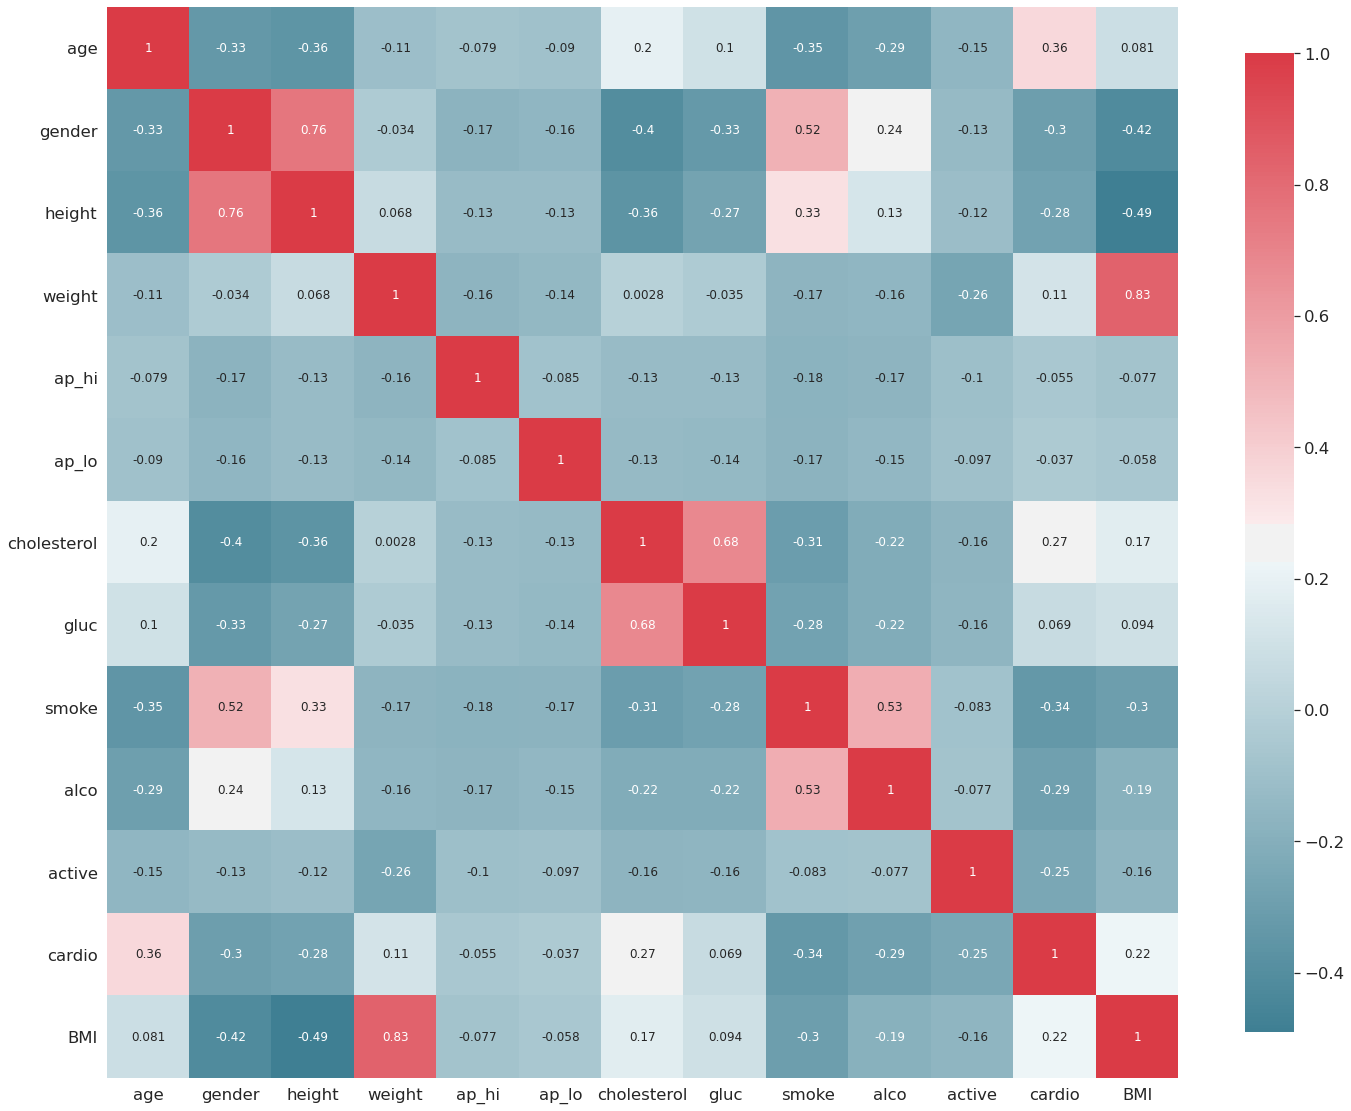

In [ ]:
corr_matrix =df.drop(["id"],axis=1).corr()
plot_correlation_map(corr_matrix)

**Ex. 13 : Quelle paire de caractéristiques a la plus forte corrélation de Pearson avec la caractéristique `gender` ?**

**Reponse :** `height`, `smoke`

## 2.2. Répartition de la taille des hommes et des femmes

De notre exploration des valeurs uniques plus tôt, nous savons que le genre est codé par les valeurs *1* et *2*. Même si vous ne connaissez pas le mappage de ces valeurs au genre, vous pouvez le comprendre graphiquement en regardant les valeurs moyennes de la taille et du poids pour chaque valeurs de la fonction `gender`.

**Ex. 14 : Créez un violinplot pour la hauteur et le genre en utilisant [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html). Utilisez les paramètres :**
- `hue` pour diviser par genre;
- `scale` pour évaluer le nombre d'enregistrements pour chaque sexe.

Pour que le tracé soit rendu correctement, vous devez convertir votre `DataFrame` au format `long` en utilisant la fonction `melt()` de `pandas`. Voici [un example](https://stackoverflow.com/a/41575149/3338479) pour votre référence.

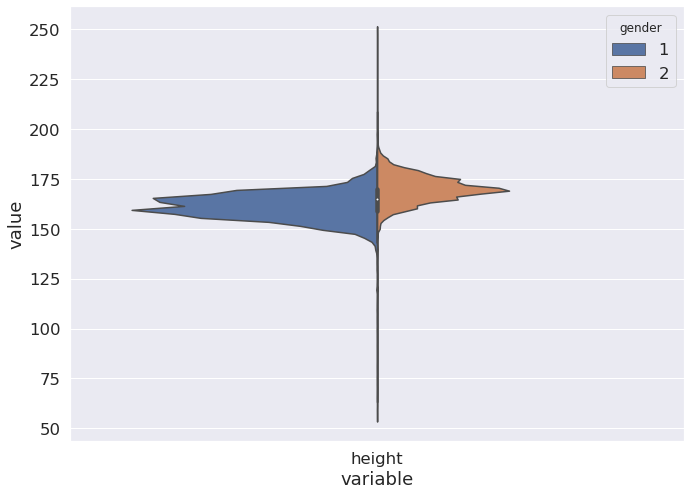

In [ ]:
# You code here

df_long = pd.melt(df, value_vars=['height'], id_vars='gender')
sns.violinplot(x='variable', y='value', hue='gender', scale='count', split=True, data=df_long)
plt.show()

## 2.3. Age

Auparavant, nous calculions l'âge des répondants en années au moment de l'examen.

**Ex. 15 : Creez un `count plot` en utilisant [`countplot()`](http://seaborn.pydata.org/generated/seaborn.countplot.html) avec l'age sur l'axe *X* et le nombre de personnes sur l'axe *Y*.**

En définitive, votre graphique devrait avoir deux colonnes pour chaque âge, correspondant au nombre de personnes pour chaque classes *cardio* de cet âge.

In [ ]:
# You code here
df['age_in_years']=np.int_(df['age']/365.25)
# df['age_in_years'].value_counts()

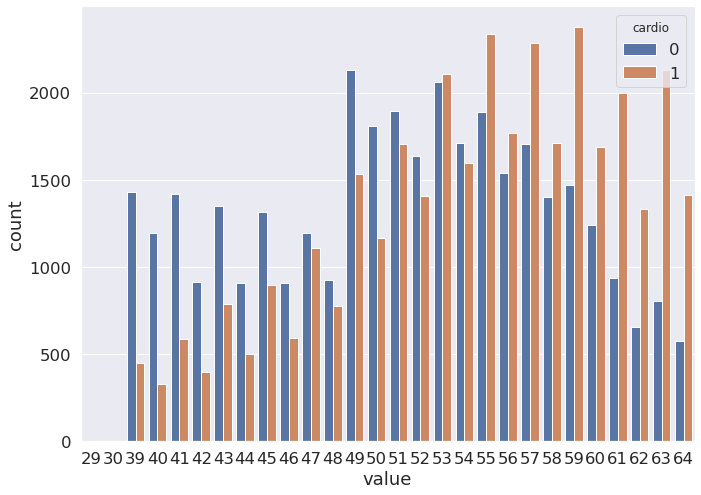

In [ ]:
# You code here
df_long = pd.melt(df, value_vars=['age_in_years'], id_vars='cardio')
sns.countplot(x='value', hue='cardio', data=df_long);

**Ex. 16 : Quel est le plus petit âge auquel le nombre de personnes atteintes d'une MCV dépasse le nombre de personnes sans MCV ?**

**Reponse :** à  53 ans